In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.RecomendadorClimatico import RecomendadorClimatico
from src.Transformaciones import Transformaciones
from src.AgregarPH import CargaData, AgregarPH

In [27]:
path = '../data/raw/ANN'

In [3]:
# 2.Importación fuente de datos

In [28]:
carga = CargaData(path+'/data.csv')
df = carga.obtener_data()
agregar_ph = AgregarPH(df)
df_con_ph = agregar_ph.generar_ph_mensual()
df_con_ph.to_csv(path+"/df_con_ph.csv", index=False)

In [29]:
#Lectura datos históricos
df = pd.read_csv(path+'/df_con_ph.csv',encoding = "ISO-8859-1",delimiter=',')

In [13]:
"""
Fuente: NASA/POWER – Resolución nativa mensual y anual
Fechas (mes/día/año): del 01/01/1981 al 31/12/2025 en hora solar local (LST)
Ubicación: Latitud 9.8062  Longitud -83.8448
Elevación según MERRA-2: Promedio para una región de 0.5 x 0.625 grados de latitud/longitud = 1064.94 metros
Valor para datos faltantes que no pueden ser calculados o que están fuera del rango de disponibilidad de las fuentes: -999
Parámetro(s):
- PRECTOTCORR: Precipitación corregida de MERRA-2 (mm/día)
- PRECTOTCORR_SUM: Suma de la precipitación corregida de MERRA-2 (mm/día)
- QV2M: Humedad específica a 2 metros según MERRA-2 (g/kg)
- RH2M: Humedad relativa a 2 metros según MERRA-2 (%)
- T2M: Temperatura a 2 metros según MERRA-2 (°C)
- T2M_MAX: Temperatura máxima a 2 metros según MERRA-2 (°C)
- T2M_MIN: Temperatura mínima a 2 metros según MERRA-2 (°C)
"""

'\nFuente: NASA/POWER – Resolución nativa mensual y anual\nFechas (mes/día/año): del 01/01/1981 al 31/12/2025 en hora solar local (LST)\nUbicación: Latitud 9.8062  Longitud -83.8448\nElevación según MERRA-2: Promedio para una región de 0.5 x 0.625 grados de latitud/longitud = 1064.94 metros\nValor para datos faltantes que no pueden ser calculados o que están fuera del rango de disponibilidad de las fuentes: -999\nParámetro(s):\n- PRECTOTCORR: Precipitación corregida de MERRA-2 (mm/día)\n- PRECTOTCORR_SUM: Suma de la precipitación corregida de MERRA-2 (mm/día)\n- QV2M: Humedad específica a 2 metros según MERRA-2 (g/kg)\n- RH2M: Humedad relativa a 2 metros según MERRA-2 (%)\n- T2M: Temperatura a 2 metros según MERRA-2 (°C)\n- T2M_MAX: Temperatura máxima a 2 metros según MERRA-2 (°C)\n- T2M_MIN: Temperatura mínima a 2 metros según MERRA-2 (°C)\n'

In [30]:
df.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,MAR_PH_SUELO,APR_PH_SUELO,MAY_PH_SUELO,JUN_PH_SUELO,JUL_PH_SUELO,AUG_PH_SUELO,SEP_PH_SUELO,OCT_PH_SUELO,NOV_PH_SUELO,DEC_PH_SUELO
0,PRECTOTCORR,1981,2.64,3.32,1.72,6.02,6.66,11.86,3.34,9.65,...,5.55,7.45,6.55,6.80,6.17,7.08,7.84,4.63,4.07,3.59
1,PRECTOTCORR,1982,3.30,2.99,1.35,3.71,8.90,2.92,8.43,4.88,...,5.98,5.83,6.61,4.81,4.27,3.04,6.41,4.15,7.49,6.58
2,PRECTOTCORR,1983,1.38,0.09,0.93,3.76,3.01,4.61,5.27,5.66,...,8.41,4.87,6.22,8.66,3.95,6.48,8.19,8.02,7.95,6.44
3,PRECTOTCORR,1984,0.69,1.01,0.60,2.72,4.78,5.78,4.80,6.55,...,7.59,8.79,4.95,4.46,6.74,6.30,9.00,4.03,5.13,6.58
4,PRECTOTCORR,1985,1.94,0.41,0.50,0.84,2.21,8.02,5.41,4.31,...,6.97,4.85,6.34,5.36,5.76,8.38,4.58,5.90,6.29,5.30


In [31]:
df.tail()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,MAR_PH_SUELO,APR_PH_SUELO,MAY_PH_SUELO,JUN_PH_SUELO,JUL_PH_SUELO,AUG_PH_SUELO,SEP_PH_SUELO,OCT_PH_SUELO,NOV_PH_SUELO,DEC_PH_SUELO
310,T2M_MIN,2021,13.59,15.41,13.38,15.34,15.95,15.07,16.23,15.62,...,5.51,5.40,7.83,6.25,3.50,8.24,7.19,5.87,7.20,5.53
311,T2M_MIN,2022,15.20,12.54,14.26,15.80,16.22,15.30,16.29,15.27,...,7.61,6.71,5.63,6.66,5.69,4.18,3.14,3.08,5.53,7.15
312,T2M_MIN,2023,14.71,13.53,15.29,14.76,16.99,15.81,16.89,17.24,...,7.64,4.65,4.17,7.98,6.69,6.71,5.36,8.67,6.23,7.92
313,T2M_MIN,2024,15.93,13.93,14.21,14.95,16.76,17.71,16.85,17.28,...,7.05,7.24,7.38,3.43,8.26,8.28,3.33,6.74,6.54,8.64
314,T2M_MIN,2025,14.90,15.61,15.96,16.50,-999.00,-999.00,-999.00,-999.00,...,3.18,7.37,8.37,7.42,6.18,4.17,4.72,3.30,7.04,7.37


In [16]:
#Notamos que anno 2025 como NO ha fanilizado tiene valores -999, esto afectaria el molode
#por lo que el grupo decide eliminar esta columna

In [32]:
# Filtrar los datos para eliminar el año 2025
df = df[df['YEAR'] != 2025]

In [33]:
df.to_csv(path+"/df_sin_2025.csv", index=False)

In [34]:
recomendador = RecomendadorClimatico(path+"/df_sin_2025.csv", path+"/datos_con_recomendaciones_completo.csv")
recomendador.procesar()

✅ Archivo generado: ../data/raw/ANN/datos_con_recomendaciones_completo.csv


In [35]:
#Lectura datos nuevos
df = pd.read_csv(path+'/datos_con_recomendaciones_completo.csv',encoding = "ISO-8859-1",delimiter=',')

In [36]:
# 3.Análisis de Datos (EDA) + Preprocesado

In [37]:
df["Recomendacion"].value_counts()

Recomendacion
fertilizacion      205
poda_preventiva    173
riego              150
Name: count, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           528 non-null    int64  
 1   MONTH          528 non-null    object 
 2   lluvia_mm      528 non-null    float64
 3   temp_max       528 non-null    float64
 4   temp_min       528 non-null    float64
 5   humedad        528 non-null    float64
 6   ph_suelo       528 non-null    float64
 7   Recomendacion  528 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 33.1+ KB


In [39]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

YEAR             0
MONTH            0
lluvia_mm        0
temp_max         0
temp_min         0
humedad          0
ph_suelo         0
Recomendacion    0
dtype: int64

In [40]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,528.0,2002.500000,12.710467,1981.00,1991.7500,2002.500,2013.2500,2024.00
lluvia_mm,528.0,5.246534,3.767827,0.02,2.4450,4.700,7.2400,25.99
temp_max,528.0,26.288277,1.649643,23.34,25.1700,25.950,27.0150,31.78
temp_min,528.0,15.276458,1.118109,11.92,14.5800,15.300,16.0800,18.14
humedad,528.0,88.266098,4.373132,73.32,85.9525,89.555,91.3850,94.48
ph_suelo,528.0,6.017481,1.744115,3.04,4.4750,6.030,7.5025,9.00


In [41]:
df

,YEAR,MONTH,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,1981,JAN,2.64,23.90,14.19,88.79,3.90,fertilizacion
1,1982,JAN,3.30,24.54,14.02,89.43,6.71,poda_preventiva
2,1983,JAN,1.38,26.13,15.75,88.61,5.63,fertilizacion
3,1984,JAN,0.69,23.68,13.14,87.41,8.37,riego
4,1985,JAN,1.94,23.45,14.37,86.96,4.78,fertilizacion
...,...,...,...,...,...,...,...,...
523,2020,DEC,10.77,24.26,13.57,91.87,6.67,poda_preventiva
524,2021,DEC,4.18,24.62,16.47,91.61,8.50,poda_preventiva
525,2022,DEC,3.39,24.12,15.47,90.88,6.84,poda_preventiva
526,2023,DEC,4.84,25.70,16.68,91.62,5.19,fertilizacion


In [28]:
#Transformaciones

#riego:1
#fertilizacion: 2
#poda_preventiva: 3

In [29]:
transformador = Transformaciones()
transformador.recomendacion_num(df)

,YEAR,MONTH,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,1981,JAN,2.64,23.90,14.19,88.79,6.25,1
1,1982,JAN,3.30,24.54,14.02,89.43,6.58,3
2,1983,JAN,1.38,26.13,15.75,88.61,3.14,2
3,1984,JAN,0.69,23.68,13.14,87.41,3.89,2
4,1985,JAN,1.94,23.45,14.37,86.96,6.11,1
...,...,...,...,...,...,...,...,...
523,2020,DEC,10.77,24.26,13.57,91.87,3.51,2
524,2021,DEC,4.18,24.62,16.47,91.61,7.90,3
525,2022,DEC,3.39,24.12,15.47,90.88,8.67,3
526,2023,DEC,4.84,25.70,16.68,91.62,3.69,2


In [22]:
#Plots

<Axes: xlabel='Recomendacion', ylabel='count'>

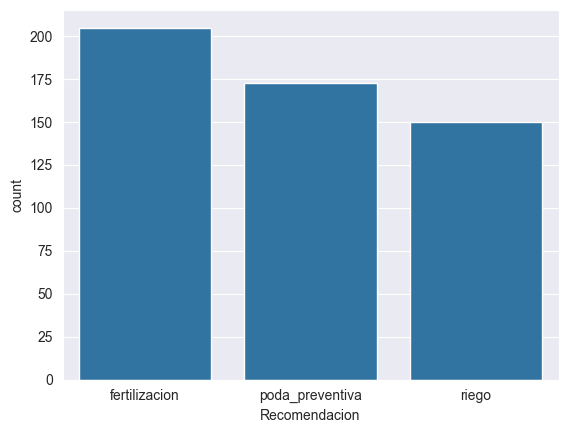

In [42]:
#Verificar si hay una proporción equilibrada entre los diferentes valores de la variable objetivo para un buen modelado posterior
sns.countplot(x='Recomendacion',data=df)

(10.0, 0.0)

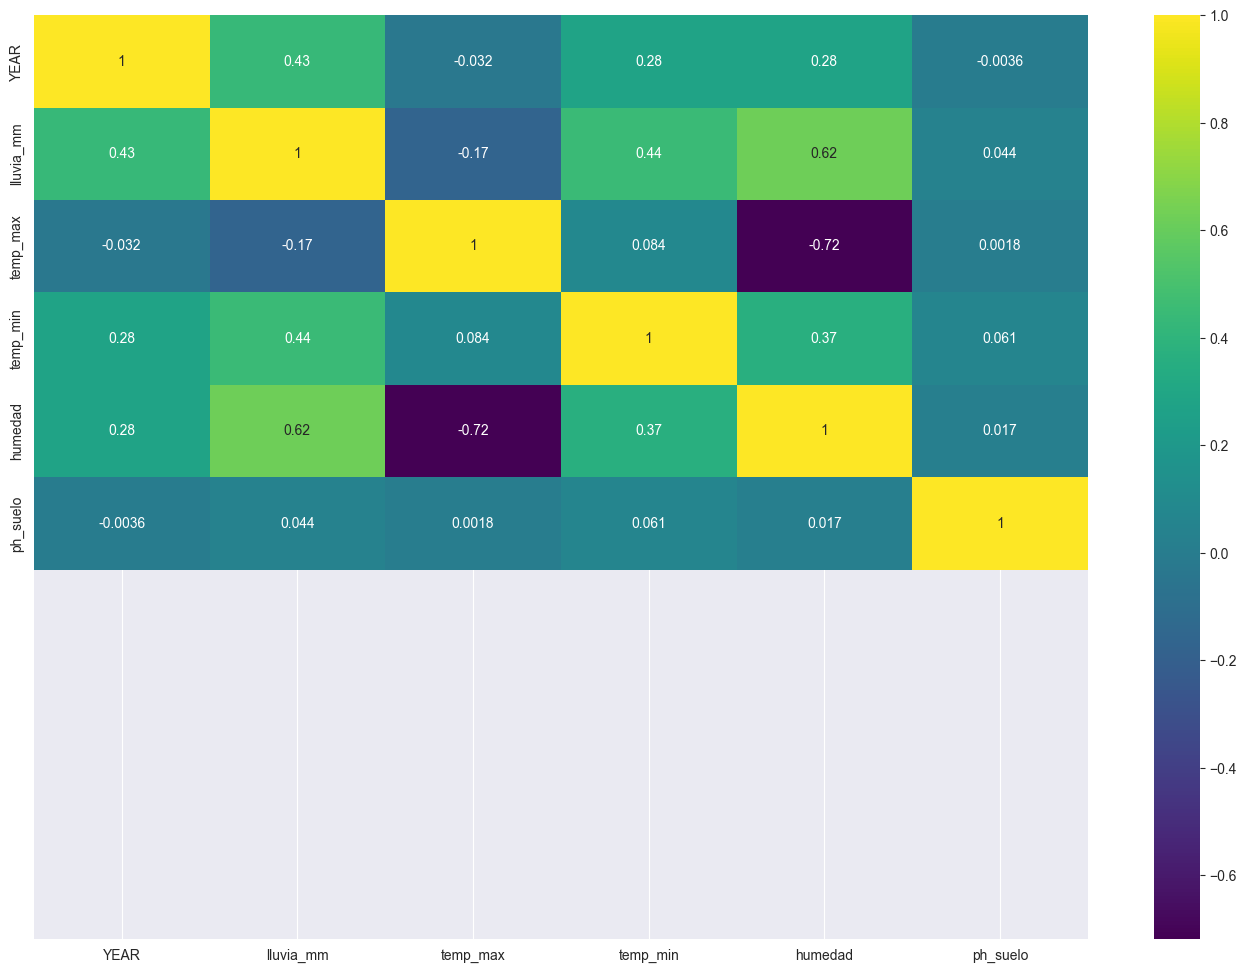

In [43]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [21]:
df.corr(numeric_only = True)['Recomendacion'].sort_values()

KeyError: 'Recomendacion'

In [22]:
df.corr(numeric_only = True)['Recomendacion'].sort_values().plot(kind='bar')

KeyError: 'Recomendacion'

In [23]:
from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler()

# columnas numéricas:
normalizar = ['lluvia_mm', 'temp_max', 'temp_min', 'humedad', 'ph_suelo']

# Aplica la normalización
df[normalizar] = escalador.fit_transform(df[normalizar])


In [44]:
df

,YEAR,MONTH,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,1981,JAN,2.64,23.90,14.19,88.79,3.90,fertilizacion
1,1982,JAN,3.30,24.54,14.02,89.43,6.71,poda_preventiva
2,1983,JAN,1.38,26.13,15.75,88.61,5.63,fertilizacion
3,1984,JAN,0.69,23.68,13.14,87.41,8.37,riego
4,1985,JAN,1.94,23.45,14.37,86.96,4.78,fertilizacion
...,...,...,...,...,...,...,...,...
523,2020,DEC,10.77,24.26,13.57,91.87,6.67,poda_preventiva
524,2021,DEC,4.18,24.62,16.47,91.61,8.50,poda_preventiva
525,2022,DEC,3.39,24.12,15.47,90.88,6.84,poda_preventiva
526,2023,DEC,4.84,25.70,16.68,91.62,5.19,fertilizacion


In [45]:
df.to_csv("../data/processed/ANN/recomendaciones.csv", index=False)